# DSE 200 FINAL PROJECT
## Fall 2021
### Due Date:  December 3rd, 2021
#### Sergey Gurvich

The final project is comprised of two parts: 
* <b>Part I</b> is a set of coding questions that require the _numpy_ library to analyze the provided dataset.  
* <b>Part II</b> is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _IO_, _pandas_, _matplotlib_ and _scilit-learn_ libraries.  

<b>Deliverables</b>: Submit both parts as one notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for Part II and reproduce your results. The notebook should be organized with a clear table of contents on top _(see example in the Pylaski notebook at https://github.com/words-sdsc/wifire/blob/master/pylaski.ipynb)_ and links to the parts/steps outlined. Don't forget to add your name on top as the author of the notebook. 

### Table of Contents:
#### [Part I](#part_i)
* [1.1 Preliminaries](#i_1)
* [1.2 Transformations](#i_2)
* [1.3 Summary Statistics](#i_3)

#### [Part II](#part_ii)
* [Step 1: Find a dataset or datasets](#ii_1)
    * [1.1 The First Dataset: National Skier/Snowboarder Visits, 1978-79 to 2020-21](#ii_1_1)
    * [1.2 The Second Dataset: Climate Data Online Web Service](#ii_1_2)
        * [A. What data is being downloaded from NOAA Web Service?](#ii_1_2_A)
        * [B. Download and save data](#ii_1_2_B)
        * [C. Inject Data](#ii_1_2_C)
* [Step 2: Explore the datasets](#ii_2)
    * [2.1 The First Dataset EDA](#ii_2_1)
        * [A. Data Cleanup and Transformation](#ii_2_1_A)
        * [B. Visual Exploration](#ii_2_1_B)
    * [2.2 The Second Dataset EDA](#ii_2_2)
        * [A. Data Cleanup](#ii_2_2_A)
        * [B. Visual Exploration](#ii_2_2_B)
        * [C. Data Transformation](#ii_2_2_C)
    * [2.3 Merging Two Datasets](#ii_2_3)
        * [A. Merging](#ii_2_3_A)
        * [B. Visual Exploration](#ii_2_3_B)
* [Step 3:  Identify 1-3 research questions and perform analysis](#ii_3)
    * [3.1 Research Questions](#ii_3_1)
    * [3.2 Analysis - Find Correlations](#ii_3_2)
    * [3.3 Analysis - Linear Regression](#ii_3_3)
* [Step 4:  Present your findings](#ii_4)
    * [4.1 Pacific Southwest](#ii_4_1)
        * [A. Connection between Weather and Visits to the Ski Resorts](#ii_4_1_A)
        * [B. Predictability of Visits to the Ski Resorts Based on the Weather Metrics](#ii_4_1_B)
    * [4.2 Northeast](#ii_4_2)
        * [A. Connection between Weather and Visits to the Ski Resorts](#ii_4_2_A)
        * [B. Predictability of Visits to the Ski Resorts Based on the Weather Metrics](#ii_4_2_B)
    * [4.3 Limitations](#ii_4_3)
    

# PART I: 20% <a class="anchor" id="part_i"></a>

### Preliminaries

In [1]:
import numpy as np

### 1.1 Preliminaries <a class="anchor" id="i_1"></a>

Use numpy to load `prostate_cancer.npy` into a numpy matrix. Print the dataset's shape and the first 5 rows.<br>

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [2]:
# For reference
column_names = ['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
                'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
diagnosis_encoding = {'Benign': 0, 'Malignant': 1}

In [3]:
# Load data
data = np.load('prostate_cancer.npy', allow_pickle=True)

# Your code here
print('Shape:', data.shape)
print('First 5 rows:\n',data[:5,:])

Shape: (100, 10)
First 5 rows:
 [[1 'M' 23 12 151 954 0.143 0.278 0.242 0.079]
 [2 'B' 9 13 133 1326 0.143 0.079 0.181 0.057]
 [3 'M' 21 27 130 1203 0.125 0.16 0.207 0.06]
 [4 'M' 14 16 78 386 0.07 0.284 0.26 0.097]
 [5 'M' 9 19 135 1297 0.141 0.133 0.181 0.059]]


### 1.2  Transformations <a class="anchor" id="i_2"></a>

* The first column is the id of the patient, which isn't relevant for our purposes. Remove that column from the matrix by creating a new matrix composed of the rest of the columns.
* The second column is the `diagnosis_result` i.e. **M** for malignant and **B** for benign. Replace **M** with `1` and **B** with `0`
* Convert the `dtype` of the resulting array to `np.float64`
* As usual, print the shape of the resulting dataset and the first 5 rows.

**Output required**: 
<ul>
    <li>Tuple representing dataset's shape</li>
    <li>Matrix representing the first 5 rows</li>
</ul>

In [4]:
# we'll make a copy so we transform not the original dataframe
data_new = data.copy()
# remove 1st column
data_new = data_new[:,1:]
# replace 'M' and 'B'
data_new[:,:1] = np.where(data_new[:,:1] == 'M', 1, 0)
# convert to np.float64
data_new = data_new.astype(np.float64)

np.set_printoptions(formatter={'float_kind':"{:.3f}".format})
print('Shape:', data_new.shape)
# print with 3 decimals
print('First 5 rows:\n',data_new[:5,:])

Shape: (100, 9)
First 5 rows:
 [[1.000 23.000 12.000 151.000 954.000 0.143 0.278 0.242 0.079]
 [0.000 9.000 13.000 133.000 1326.000 0.143 0.079 0.181 0.057]
 [1.000 21.000 27.000 130.000 1203.000 0.125 0.160 0.207 0.060]
 [1.000 14.000 16.000 78.000 386.000 0.070 0.284 0.260 0.097]
 [1.000 9.000 19.000 135.000 1297.000 0.141 0.133 0.181 0.059]]


### 1.3 Summary Statistics <a class="anchor" id="i_3"></a>

**a)** Print the means and standard deviations of each column

**Output required**: 
<ul>
    <li>Floats representing the mean of each column</li>
    <li>Floats representing the standard deviation of each column</li>
</ul>

In [5]:
print('Mean', data_new.mean(axis = 0))
print('STD', data_new.std(axis = 0))

Mean [0.620 16.850 18.230 96.780 702.880 0.103 0.127 0.193 0.065]
STD [0.485 4.855 5.167 23.557 318.108 0.015 0.061 0.031 0.008]


**b)** Print the minimum and maximum values of each column

**Output required**: 
<ul>
    <li>Floats representing the minimum value found in each column</li>
    <li>Floats representing the maximum value found in each column</li>
</ul>

In [6]:
print('Min',data_new.min(axis = 0))
print('Max',data_new.max(axis = 0))

Min [0.000 9.000 11.000 52.000 202.000 0.070 0.038 0.135 0.053]
Max [1.000 25.000 27.000 172.000 1878.000 0.143 0.345 0.304 0.097]


**c)** Calculate the `diagnosis_result`-wise means and standard deviations.<br>
**Report these values with respect to the actual *name* of the result, for which you must refer to 1.1**

**Output required**: 
<ul>
    <li>For each of the 2 results in the dataset:<ul>
        <li>Floats representing the standard deviation of each column for this result</li>
        <li>Floats representing the mean of each column for this result</li>
</ul>

In [7]:
# From 1.1: diagnosis_encoding = {'Benign': 0, 'Malignant': 1}
print('Benign Result Means:\n', data_new[data_new[:,0]==0].mean(axis=0))
print('Benign Result STD:\n', data_new[data_new[:,0]==0].std(axis=0))

print('Malignant Result Means:\n', data_new[data_new[:,0]==1].mean(axis=0))
print('Malignant Result STD:\n', data_new[data_new[:,0]==1].std(axis=0))

Benign Result Means:
 [0.000 17.947 17.763 78.500 474.342 0.099 0.087 0.184 0.065]
Benign Result STD:
 [0.000 4.994 5.117 17.247 216.695 0.015 0.042 0.030 0.008]
Malignant Result Means:
 [1.000 16.177 18.516 107.984 842.952 0.105 0.151 0.199 0.065]
Malignant Result STD:
 [0.000 4.640 5.177 19.556 287.755 0.014 0.058 0.030 0.008]


# PART II : 80% <a class="anchor" id="part_ii"></a>

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

## Step 1: Find a dataset or datasets <a class="anchor" id="ii_1"></a>

Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.


### Preliminaries

#### 1. Download CSV version of dataset-1 and put it into the same folder as this notebook: https://raw.githubusercontent.com/sgurvich83/dse200project/main/Historical_Skier_Days_1979_2021.csv
#### 2. Download the set of pre-downloaded and preprocessed CSV files (dataset-2). After uncompressing it, the csv files should be in 'downloaded_weather_data' folder: https://raw.githubusercontent.com/sgurvich83/dse200project/main/downloaded_weather_data.zip

#### 3. For the second dataset the notebook contains explanation and code how to download data from the API and transform it to files in downloaded_weather_data.zip. This is very time-consuming because of the nature of NOAA API, that's why the zip file is provided. The data injection of this data is in section [C. Inject Data](#ii_1_2_C).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import *
from warnings import simplefilter

### 1.1 The First Dataset: <a class="anchor" id="ii_1_1"></a>
### National Skier/Snowboarder Visits, 1978-79 to 2020-21 (by National Ski Area Association)
source: https://nsaa.org/webdocs/Media_Public/IndustryStats/Historical_Skier_Days_1979_2021.pdf

The original dataset is in PDF format. Since it is a small dataset, it was easy to manually convert it to CSV file (the following service was used: https://www.adobe.com/acrobat/online/pdf-to-excel.html). 

Let's inject it and look at the structure:

In [9]:
ski_df = pd.read_csv('Historical_Skier_Days_1979_2021.csv')
ski_df.head()

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
0,2020/21,12252,5235,7098,22638,7238,4544,11781,59004,5
1,2019/20,11488,3835,6396,20107,5959,3294,9253,51079,33
2,2018/19,12514,4262,6498,24408,7585,4075,11660,59343,4
3,2017/18,11987,4161,6257,20792,6227,3850,10081,53273,25
4,2016/17,11936,4184,5421,21736,7385,4098,11483,54761,15


* The features of the dataset contain regions, defined by NSAA. Here is the the map for future reference:


<img src="https://nsaa.org/webdocs/Media_Public/IndustryStats/NSAA_Resort_Regions.jpg" width=400/>

### 1.2 The Second Dataset: <a class="anchor" id="ii_1_2"></a>
### Climate Data Online Web Service (by NOAA)
source: https://www.ncdc.noaa.gov/cdo-web/webservices/v2

The original dataset is NOAA's database. The data is served via API. The above link has full documentation about the web service: endpoints, request headers, responses. Each request has to include user token in the headers. The instruction to obtain the token located at: https://www.ncdc.noaa.gov/cdo-web/token. Here is the screenshot from Postman app from one of the requests:

<img src="postman.png" width=250 style="border:1px solid orange"/>

#### A. What data is being downloaded from NOAA Web Service?<a class="anchor" id="ii_1_2_A"></a>
* In the dataset #1 we are talking about winter sports. Therefore, the decision was made to download only the most obvious winter-related weather metrics:

In [10]:
WEATHER_FEATURES = {
    'PRCP' : ['precipitation','in'],
    'SNOW' : ['snowfall','in'],
    'TAVG' : ['average temperature','F'],
    'TMIN' : ['min. temperature','F'],
    'EMNT' : ['extreme min temperature','F'],
    'TMAX' : ['max. temperature','F'],
    'EMXT' : ['extreme max temperature','F']
}

*  Our research will be limited to 
    * Pacific Southwest region (PSW): we are located in it, mostly has local visits
        * Hawaii is excluded from PSW region in this research, because of its special geolocation.
    * Northwest region (NE): the largest region, mostly has local visits
    
Here are the states for each region of interest, according to NSAA map:

In [11]:
# Pacific Southwest States
PSW_STATES = ['AZ', 'CA', 'NV']
# Northeast States
NE_STATES = ['CT', 'ME', 'MA', 'NY','NH', 'RI', 'VT']

_Note: on the contrast, the Rocky Mountains region is well known tourist destination. In the next section,  [the graphs](#dataset_1_EDA_B_trends) will show how its trend is different from 'local visits' regions. Therefore, it won't be a subject of this research to maintain simplicity._

#### B. Download and save data<a class="anchor" id="ii_1_2_B"></a>

* In order to avoid the data re-download every time we run this notebook, the following switch will restrict any data downloading/saving:
    * ON (True): we already have processed data locally, no need to download it again
    * OFF (False): we want to re-download and re-process the data

_Note: the downloaded data can reach ~100mb, it can take hours to download because the web service might throw errors or just be very slow. Therefore, it is better to have the data ready and avoid redundant downloads._

In [12]:
weather_data_ready = True

**The following function:**
1. Downloads data from NOAA Climate Online API - Global Summary of the Month (GSOM) dataset. 
    1. The data will be downloaded for winter months: November, December, January, February, March.
    2. The API has pagination, so the function will append response data until reached the last page.

2. Saves data into folders with special structure. 
</br>Example: **./downloaded_weather_data/CA/weather_data_CA_season_2007_2008.csv**

Parameters:
*  state: state code (CA)
*  year: year to download the data (1995 means that season 1995-1996 will be downloaded)

In [13]:
# create folders to save states weather data
if not weather_data_ready:
    !mkdir weather_data
    for state in STATE_CODES:
        !mkdir weather_data/{state}

In [14]:
# api url and token
URL = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
TOKEN = "uXrydZcltFqeCuirKFQoTmacKsxNMNEx"

# Map of states codes in NOAA dataset
STATE_CODES = {
#     Pacific Southwest States
    'AZ':'FIPS:04', 'CA':'FIPS:06', 'NV':'FIPS:32',
#     Northeast States
    'NY':'FIPS:36', 'VT':'FIPS:50', 'ME':'FIPS:23', 
    'NH':'FIPS:33', 'MA':'FIPS:25', 'CT':'FIPS:09', 
    'RI':'FIPS:44'}

def download_climate_data(state: str, year: int):
    # will hold data for particular season before saving to csv
    weather_data = pd.DataFrame()
    
    # start with offset 1 and will increment by 1000 to download all pages
    offset=1
    limit=1000
    
    # if year is 2000, the season is 2000/2001
    years_season=[year,year+1]
    
    # download all pages until reached the end
    while True:
        # this will be appended to the url as parameters
        params = {
        "datasetid": "GSOM",
        "locationid": STATE_CODES[state],
        "startdate": f"{years_season[0]}-11-01",  # beginning November
        "enddate": f"{years_season[1]}-03-01", # ending March
        "datatypeid": WEATHER_FEATURES.keys(),
        "limit":limit,
        "includemetadata":True,
        "units":"standard",
        "offset":offset
        }
        headers = {"token": TOKEN}
               
        # make request
        http_response=requests.get(url=URL, params=params, headers=headers)
        data = json.loads(http_response.text)
        
        # append page to season's dataframe
        weather_data = weather_data.append(pd.DataFrame(data['results']))
        
        # if reached last page, stop and go to next season
        if data['metadata']['resultset']['count'] - offset < limit:
            break
        
        # to download the next page
        offset = offset + limit
    
    # save file locally
    weather_data.to_csv(f'downloaded_weather_data/{state}/weather_data_{state}_season_{years_season[0]}_{years_season[1]}.csv')
    
    # for debug    
    print(f'Downloaded season: {years_season}')

* Download and save data for seasons: 
    * PSW region: 1995-2020 (the first dataset has only data starting 1995 for this region)
    * NE region: 1978-2020

In [15]:
if not weather_data_ready:    
    for state in PSW_STATES:
        for year in range(1995,2021):
            download_climate_data(state=state, year=year)
    for state in NE_STATES:
        for year in range(1978,2021):
            download_climate_data(state=state, year=year)

**The following function:**
1. Reads and collects previously downloaded data for requested state and time period (downloaded and saved by previous function).
2. Saves accumulated state data for all years into one file. Example:
    **./final\_weather_data/weather_data_CA_1995_2021.csv**
3. One more column is added to identify the season (to differentiate from date's 'year'). Example: '2000/2001'.

Parameters:
* state: state code (CA)
* start_year: year to start reading of data (1995)
* end_year: year to end reading of data (2021)

In [16]:
# create folder to save final states weather data
if not weather_data_ready:
    !mkdir final_weather_data

In [17]:
def read_save_climate_data(state: str, start_year: int, end_year: int):
    count = start_year
    final_df = pd.DataFrame()
    while count < end_year:
        # read weather csv
        file_to_read = f'downloaded_weather_data/{state}/weather_data_{state}_season_{count}_{count+1}.csv'
        partial_data = pd.read_csv(file_to_read, index_col=0)
        
        # for future processing, add new column with season like '2017/2018'
        partial_data['season'] = f'{count}/{count+1}'
        
        # if first iteration, create df, else append df
        if len(final_df):
            final_df = final_df.append(partial_data, ignore_index = True)
        else:
            final_df = partial_data
        
        # go to next file         
        count += 1
        
    # save to new big file     
    print('Final DF shape:', final_df.shape)
    final_df.to_csv(f'final_weather_data/weather_data_{state}_{start_year}_{end_year}.csv')

* Read, process and save final data for seasons: 
    * PSW region: 1995-2020 (the first dataset has only data starting 1995 for this region)
    * NE region: 1978-2020

In [18]:
if not weather_data_ready:
    for st in PSW_STATES:
        read_save_climate_data(state=st, start_year=1995, end_year=2021)
    for st in NE_STATES:
        read_save_climate_data(state=st, start_year=1978, end_year=2021)

#### C. Inject Data <a class="anchor" id="ii_1_2_C"></a>
* Initially, each state will have its own dataframe. We'll store dataframes in dictionary: df_weather[state]

In [19]:
# Read Pacific Southwest Data (1995-2021)
df_weather = {}
for st in PSW_STATES:
    df_weather[st] = pd.read_csv(f'final_weather_data/weather_data_{st}_1995_2021.csv', index_col=0)

# Read Northeast Data (1995-2021)
for st in NE_STATES:
    df_weather[st] = pd.read_csv(f'final_weather_data/weather_data_{st}_1978_2021.csv', index_col=0)

## Step 2: Explore the datasets <a class="anchor" id="ii_2"></a>

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

### 2.1 The First Dataset EDA <a class="anchor" id="ii_2_1"></a>

#### A. Data Cleanup and Transformation <a class="anchor" id="ii_2_1_A"></a>

In [20]:
ski_df.head()

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
0,2020/21,12252,5235,7098,22638,7238,4544,11781,59004,5
1,2019/20,11488,3835,6396,20107,5959,3294,9253,51079,33
2,2018/19,12514,4262,6498,24408,7585,4075,11660,59343,4
3,2017/18,11987,4161,6257,20792,6227,3850,10081,53273,25
4,2016/17,11936,4184,5421,21736,7385,4098,11483,54761,15


In [21]:
ski_df.tail()

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
38,1982/83,9523,4256,6213,14808,Not avail,Not avail,12061,46861,41
39,1981/82,11467,5064,7846,15337,Not avail,Not avail,11004,50718,36
40,1980/81,8953,4172,7688,10486,Not avail,Not avail,8401,39700,43
41,1979/80,8655,4230,8682,17160,Not avail,Not avail,9473,48200,40
42,1978/79,11294,3763,9743,15837,Not avail,Not avail,9560,50197,38


In [22]:
ski_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SEASON             43 non-null     object
 1   Northeast          43 non-null     int64 
 2   Southeast          43 non-null     int64 
 3   Midwest            43 non-null     int64 
 4   Rocky_Mtn          43 non-null     int64 
 5   Pacific Southwest  43 non-null     object
 6   Pacific Northwest  43 non-null     object
 7   Pacific West       43 non-null     int64 
 8   National Total     43 non-null     int64 
 9   National Rank      43 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 3.5+ KB


* Convert 'Not avail' to np.nan, so we can get rid of string data

In [23]:
ski_df.replace(to_replace='Not avail', value=np.nan, inplace=True)
ski_df.tail()

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
38,1982/83,9523,4256,6213,14808,NaN,NaN,12061,46861,41
39,1981/82,11467,5064,7846,15337,NaN,NaN,11004,50718,36
40,1980/81,8953,4172,7688,10486,NaN,NaN,8401,39700,43
41,1979/80,8655,4230,8682,17160,NaN,NaN,9473,48200,40
42,1978/79,11294,3763,9743,15837,NaN,NaN,9560,50197,38


* There is a mistake in the original dataset: duplicate season 2006

In [24]:
ski_df.loc[14:15]

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
14,2006/07,11801,4888,7200,20849,6536,3794,10330,55068,14
15,2006/07,12505,5839,7787,20717,7916,4133,12049,58897,6


In [25]:
ski_df.SEASON.values[15] = '2005/06'

In [26]:
ski_df.loc[14:15]

,SEASON,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total,National Rank
14,2006/07,11801,4888,7200,20849,6536,3794,10330,55068,14
15,2005/06,12505,5839,7787,20717,7916,4133,12049,58897,6


* We'll replace season label like '2007/08' by simply year ('2007')

In [27]:
ski_df.SEASON = ski_df.SEASON.apply(lambda x: x[:4])
ski_df.SEASON = ski_df.SEASON.astype(int)
ski_df.rename(columns={'SEASON':'year'}, inplace=True)

* Drop 'rank' column and make year as index

In [28]:
ski_df.set_index('year', inplace=True)
ski_df.drop(columns=['National Rank'], inplace=True)
ski_df.head()

,Northeast,Southeast,Midwest,Rocky_Mtn,Pacific Southwest,Pacific Northwest,Pacific West,National Total
year,,,,,,,,
2020,12252,5235,7098,22638,7238,4544,11781,59004
2019,11488,3835,6396,20107,5959,3294,9253,51079
2018,12514,4262,6498,24408,7585,4075,11660,59343
2017,11987,4161,6257,20792,6227,3850,10081,53273
2016,11936,4184,5421,21736,7385,4098,11483,54761


#### B. Visual Exploration <a class="anchor" id="ii_2_1_B"></a>

* Lets look at each region's average contribution in pie chart

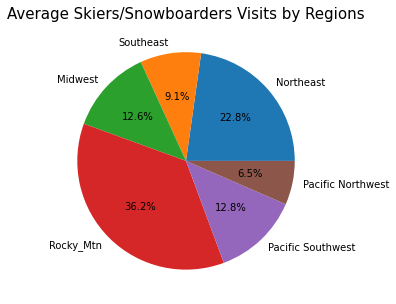

In [29]:
# create dataframe for pie data
pie_data = ski_df.copy().dropna()
pie_data['Pacific Southwest'] = pie_data['Pacific Southwest'].astype(int)
pie_data['Pacific Northwest'] = pie_data['Pacific Northwest'].astype(int)

# we want mean of each region
pie_data = pie_data.mean().reset_index()

# drop Pacific West (it contains sum of PSW and PNW) and National Total 
pie_data.drop([6,7], inplace=True)
pie_data.columns = ['Region', 'Value']
pie_data.Value = pie_data.Value.astype(int)

# show plot
plt.rcParams['figure.figsize'] = [5,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Average Skiers/Snowboarders Visits by Regions', fontsize= 15)
ax1.pie(x=pie_data['Value'], labels=pie_data['Region'], autopct='%1.1f%%', normalize=True)
plt.show()

<span style='color:Navy'>
</br>
As we can see, the two biggest regions (by visits) are Rocky Mountains and the Northeast.
</br>
</br>  
</span>

* Are there any trends over time for each region?

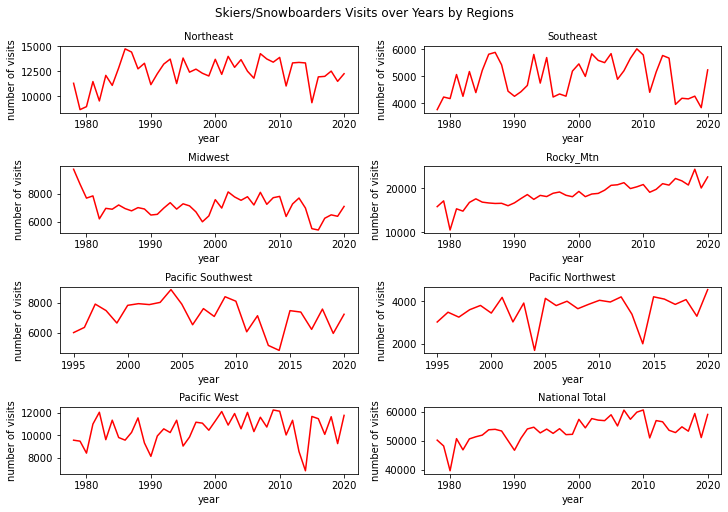

In [30]:
plt.rcParams['figure.figsize'] = [10,7]
fig, ax = plt.subplots(nrows=4, ncols=2, constrained_layout=True)

for i, row in enumerate(ax):
    # to select separate region in each cell     
    start=i*2
    end=start+2
    for col,feature in zip(row, ski_df.columns[start:end]):
        # each feature needs separate data cleaning
        ski_data = ski_df[[feature]].copy()
        ski_data.dropna(inplace=True)
        ski_data[feature] = ski_data[feature].astype(int)
        
        # make plot in cell
        y = ski_data[feature].values
        x = ski_data.index.values
        col.plot(x, y, '-r', label='visits')
        col.set_xlabel('year')
        col.set_ylabel('number of visits')
        col.set_title(f'{feature}', fontsize=10)
plt.suptitle('Skiers/Snowboarders Visits over Years by Regions')
plt.show()

<span style='color:Navy'>
</br>
Interesting findings: <a class="anchor" id="dataset_1_EDA_B_trends"></a>
<ul>
<li> National Total tends to increase visits over time: this might be related to the national population growth
<li> Rocky Mountains region tends to increase visits over time: this might be related to the national population growth too, sinace this region attracts people from all states
</ul>
</span>

### 2.2 The Second Dataset EDA <a class="anchor" id="ii_2_2"></a>

#### A. Data Cleanup <a class="anchor" id="ii_2_2_A"></a>

* Initial ad-hoc exploration of weather datasets for each state

In [31]:
for st in PSW_STATES+NE_STATES:
    print(f'{st} df shape:',df_weather[st].shape)

AZ df shape: (197113, 6)
CA df shape: (486121, 6)
NV df shape: (143478, 6)
CT df shape: (35207, 6)
ME df shape: (96570, 6)
MA df shape: (86510, 6)
NY df shape: (237149, 6)
NH df shape: (65009, 6)
RI df shape: (12378, 6)
VT df shape: (56060, 6)


In [32]:
df_weather['AZ'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197113 entries, 0 to 197112
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        197113 non-null  object 
 1   datatype    197113 non-null  object 
 2   station     197113 non-null  object 
 3   attributes  197113 non-null  object 
 4   value       197113 non-null  float64
 5   season      197113 non-null  object 
dtypes: float64(1), object(5)
memory usage: 10.5+ MB


In [33]:
df_weather['AZ'].head()

,date,datatype,station,attributes,value,season
0,1995-11-01T00:00:00,EMNT,GHCND:MXN00002037,",m,28,",41.0,1995/1996
1,1995-11-01T00:00:00,EMXT,GHCND:MXN00002037,",m,04,",96.0,1995/1996
2,1995-11-01T00:00:00,PRCP,GHCND:MXN00002037,",,,m",0.0,1995/1996
3,1995-11-01T00:00:00,TAVG,GHCND:MXN00002037,",m",68.6,1995/1996
4,1995-11-01T00:00:00,TMAX,GHCND:MXN00002037,",,,m",84.9,1995/1996


* Are there any missing values?

In [34]:
for st in PSW_STATES+NE_STATES:
    print(st+'\n', df_weather['CA'].isna().any())

AZ
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
CA
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
NV
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
CT
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
ME
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
MA
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
NY
 date          False
datatype      False
station       False
attributes    False
value         False
season        False
dtype: bool
NH
 date          False
datatype      False
stat

* We don't need station and attributes columns

In [35]:
for st in PSW_STATES+NE_STATES:
    df_weather[st].drop(columns=['station','attributes'], inplace=True)

In [36]:
df_weather['ME'].head(10)

,date,datatype,value,season
0,1978-11-01T00:00:00,EMNT,1.00,1978/1979
1,1978-11-01T00:00:00,EMXT,61.00,1978/1979
2,1978-11-01T00:00:00,PRCP,1.93,1978/1979
3,1978-11-01T00:00:00,SNOW,5.10,1978/1979
4,1978-11-01T00:00:00,TAVG,32.60,1978/1979
5,1978-11-01T00:00:00,TMAX,42.70,1978/1979
6,1978-11-01T00:00:00,TMIN,22.50,1978/1979
7,1978-11-01T00:00:00,EMNT,6.00,1978/1979
8,1978-11-01T00:00:00,EMXT,58.00,1978/1979
9,1978-11-01T00:00:00,PRCP,1.98,1978/1979


#### B. Visual Exploration <a class="anchor" id="ii_2_2_B"></a>
##### Before we transform the weather data to mergeable format, lets look at distributions of 3 (presumptively) main features of few states.

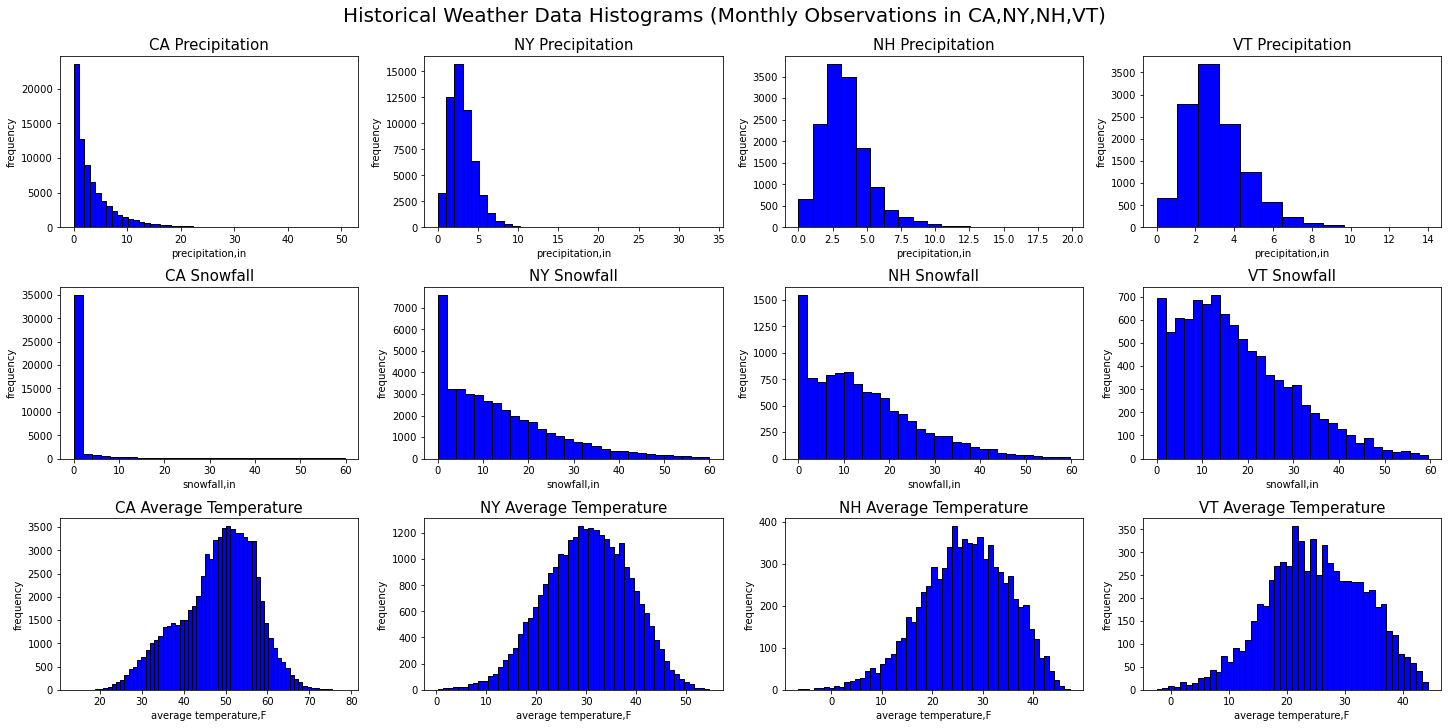

In [37]:
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(nrows=3, ncols=4, constrained_layout=True)
states = ['CA', 'NY', 'NH', 'VT']
plt.suptitle('Historical Weather Data Histograms (Monthly Observations in CA,NY,NH,VT)', fontsize=20)

for row, feature in zip(ax, list(WEATHER_FEATURES)[:3]):
    for col, state in zip(row, states):
        hist_data = df_weather[state][df_weather[state].datatype == feature]
        
        # snowfall feature needs special data cleaning and number of bins
        number_of_bins = int(hist_data.value.max()  - hist_data.value.min()) if feature != 'SNOW' else 30
        if feature == 'SNOW':
            hist_data = hist_data[hist_data.value<60]
        
        col.hist(hist_data.value, number_of_bins, facecolor='blue',density=False, ec='black')
        col.set_xlabel(WEATHER_FEATURES[feature][0]+','+WEATHER_FEATURES[feature][1])
        col.set_ylabel('frequency')
        col.set_title(state+' '+WEATHER_FEATURES[feature][0].title(), fontsize=15)
plt.show()

<span style='color:Navy'>
</br>
From these graphs, we can see few insights:
<ul>
<li> Snowfall: in California mostly there are 0 inches. In NE states, the distribution tends to be more normal especially if we move to the north geographically. 
<li> Winter Precipitation: in California we have mostly obsevations with 0 inches per month. The graph has positive skewness. On the other hand, NE states have more normal distribution.
<li>Mean Temperature: the distributions are almost normal across states. In CA the mean temp. is around ~50, in NY: ~30, Vermont: ~25 F.
</ul>
</span>

#### C. Data Transformation <a class="anchor" id="ii_2_2_C"></a>

##### Our weather data has completely different structure than the ski visits data. We have to transform it in order to be able to merge two datasets:
<img src="transform.png" width=600/>


* The following function will convert input state weather dataframe to dataframe with columns: 
    * YEAR - year (season)
    * PRCP - mean season precipitation
    * SNOW - mean season snowfall
    * TAVG - mean season temperature (average of monthly mean temp.)
    * TMIN  - mean season min temperature (average of monthly min temp.)
    * TMAX - mean season max temperature (average of monthly max temp.)
    * EMNT - mean season extreme min temperature (average of monthly extreme min temp.)
    * EMXT - mean season extreme max temperature (average of monthly extreme max temp.)

In [38]:
def create_final_df(input_df, start_year, end_year, state):   
    # calculate monthly mean values of all stations by datatype, save to temporary df
    temp_df = input_df.groupby(['date','season', 'datatype']).mean().reset_index()
    
    # to preserve monthly data along with season string, we'll concat. them. Example: '1996-03-01T00:00:00_1995/1996'
    temp_df.date = temp_df.date+'_'+temp_df.season
    
    # season not needed anymore
    temp_df.drop('season', axis=1,inplace=True)
    
    # make the transformation
    temp_df = temp_df.pivot('date', ['datatype']).reset_index()
    
    # we need only season(start_year), not the full date. Example: '1996-03-01T00:00:00_1995/1996' becomes '1995' 
    temp_df.date = temp_df.date.apply(lambda x: x[20:24])
    
    # year should be int
    temp_df.date = temp_df.date.astype(int)
    
    # After groupby, the dataframe has 2 levels of column tags. Make 1 level column tags and add <state> prefix. Example: 'CA_SNOW'.
    temp_df.columns = ['YEAR', f'{state}_EMNT', f'{state}_EMXT', f'{state}_PRCP', 
                    f'{state}_SNOW', f'{state}_TAVG', f'{state}_TMAX', 
                    f'{state}_TMIN']
    
    # final calculation of metrics means by year
    output_df = temp_df.groupby('YEAR').mean()    
    
    return output_df

* Transform weather data and save to 2 separate dict of dataframes for NE and PSW regions

In [39]:
# PSW final dict of df
df_weather_final_psw = {}
for st in PSW_STATES:
    df_weather_final_psw[st] = create_final_df(input_df=df_weather[st], start_year=1995, end_year=2021, state=st)

# NE final dict of df
df_weather_final_ne = {}
for st in NE_STATES:
    df_weather_final_ne[st] = create_final_df(input_df=df_weather[st], start_year=1978, end_year=2021, state=st)

df_weather_final_psw['CA'].head(5)

,CA_EMNT,CA_EMXT,CA_PRCP,CA_SNOW,CA_TAVG,CA_TMAX,CA_TMIN
YEAR,,,,,,,
1995,27.702293,74.348894,4.445083,2.202326,50.012893,60.648329,39.371186
1996,26.784367,72.312633,4.986268,1.972816,48.714785,59.147933,38.334664
1997,27.844192,69.666175,6.673730,2.803466,47.054898,56.190591,37.867680
1998,24.734344,69.273395,3.705109,2.453126,46.174368,56.599822,35.656057
1999,28.314548,72.039817,3.733709,1.668686,48.841054,59.334677,38.303852


* Now we can concatenate each regions' state weather data into 2 big final dataframes

In [40]:
# final big df with all the psw states data
df_weather_final_psw = pd.concat(df_weather_final_psw.values(), axis=1)

# final big df with all the ne states data
df_weather_final_ne = pd.concat(df_weather_final_ne.values(), axis=1)

* Add columns for Total for each feature, which will be mean of feature accross states for each df

In [41]:
# add column with totals for PSW
for feature in ['PRCP', 'SNOW','TAVG', 'TMIN', 'TMAX', 'EMNT', 'EMXT']:  # these features we want to sum
    # 'REG_MEAN_SNOW' will have a mean of 'AZ_SNOW', 'CA_SNOW', 'NV_SNOW' columns
    df_weather_final_psw[f'REGION_MEAN_{feature}'] = df_weather_final_psw[[x+f'_{feature}' for x in PSW_STATES]].mean(axis=1)
    # same for NE region
    df_weather_final_ne[f'REGION_MEAN_{feature}'] = df_weather_final_ne[[x+f'_{feature}' for x in NE_STATES]].mean(axis=1)

* Make sure that we have what we need after all the transformations

In [42]:
df_weather_final_psw.head()

,AZ_EMNT,AZ_EMXT,AZ_PRCP,AZ_SNOW,AZ_TAVG,AZ_TMAX,AZ_TMIN,CA_EMNT,CA_EMXT,CA_PRCP,...,NV_TAVG,NV_TMAX,NV_TMIN,REGION_MEAN_PRCP,REGION_MEAN_SNOW,REGION_MEAN_TAVG,REGION_MEAN_TMIN,REGION_MEAN_TMAX,REGION_MEAN_EMNT,REGION_MEAN_EMXT
YEAR,,,,,,,,,,,,,,,,,,,,,
1995,21.763024,75.279593,0.596901,0.994358,49.269141,63.642024,34.875072,27.702293,74.348894,4.445083,...,38.126548,50.507334,25.921681,2.284528,2.350666,45.802861,33.389313,58.265896,19.497117,71.507799
1996,19.319936,73.415313,0.962582,2.228819,47.048002,60.851752,33.355087,26.784367,72.312633,4.986268,...,36.416961,47.910977,25.128091,2.596406,2.593517,44.059916,32.272614,55.970221,18.233652,69.420148
1997,20.795644,70.744192,1.896708,2.235910,44.610996,57.239840,32.004335,27.844192,69.666175,6.673730,...,35.508904,46.382833,24.690383,3.455871,3.028926,42.391599,31.520799,53.271088,20.009394,66.768345
1998,21.188896,73.501795,0.479494,0.551570,47.750737,62.604974,32.929826,24.734344,69.273395,3.705109,...,35.612897,47.585893,23.654955,1.777161,1.941947,43.179334,30.746946,55.596896,17.846591,68.087977
1999,20.842282,73.886367,0.590286,1.143244,47.601711,62.281139,33.045739,28.314548,72.039817,3.733709,...,37.439327,49.737093,25.168221,1.878367,1.772031,44.627364,32.172604,57.117636,20.209188,69.510856


In [43]:
df_weather_final_ne.head()

,CT_EMNT,CT_EMXT,CT_PRCP,CT_SNOW,CT_TAVG,CT_TMAX,CT_TMIN,ME_EMNT,ME_EMXT,ME_PRCP,...,VT_TAVG,VT_TMAX,VT_TMIN,REGION_MEAN_PRCP,REGION_MEAN_SNOW,REGION_MEAN_TAVG,REGION_MEAN_TMIN,REGION_MEAN_TMAX,REGION_MEAN_EMNT,REGION_MEAN_EMXT
YEAR,,,,,,,,,,,,,,,,,,,,,
1978,5.349784,60.838961,5.448641,4.967884,32.193403,41.345719,23.015411,-9.272471,53.975420,3.982838,...,23.498400,33.308800,13.687200,4.312420,11.341659,28.223497,18.954992,37.478445,-1.469570,57.948344
1979,8.627359,59.891558,3.632851,2.522926,33.794420,43.050260,24.540619,-4.567106,53.283768,2.461918,...,26.136954,35.682154,16.580862,2.862872,5.689144,30.091607,20.839080,39.346702,2.107204,57.679599
1980,0.643648,62.108206,2.954444,4.513338,30.807555,40.966940,20.638707,-7.579288,52.991194,2.572684,...,22.674485,32.918319,12.347162,2.757191,9.343173,27.194367,17.170229,37.222453,-3.185844,58.360561
1981,3.890526,58.174887,3.694131,6.368818,30.889322,40.198862,21.598158,-9.683159,49.275653,3.373906,...,22.565973,32.522863,12.624919,3.506509,13.799723,27.113311,17.739102,36.481365,-1.193191,54.067680
1982,6.306291,63.753810,4.509632,6.988453,35.828055,44.855429,26.786348,-3.862390,56.170576,3.834331,...,28.116126,37.724783,18.512174,3.980188,8.960142,32.269263,23.156945,41.378518,1.187046,60.318511


_Now the final dataframes are ready to be merged with ski visits data._

### 2.3 Merging Two Datasets Together <a class="anchor" id="ii_2_3"></a> 
#### A. Merging <a class="anchor" id="ii_2_3_A"></a>

In [44]:
# PSW
df_weather_final_psw = pd.concat([df_weather_final_psw, ski_df[['Pacific Southwest']].dropna()], axis=1)
# NE
df_weather_final_ne = pd.concat([df_weather_final_ne, ski_df[['Northeast']].dropna()], axis=1)

In [45]:
# convert to int
df_weather_final_psw['Pacific Southwest'] = df_weather_final_psw['Pacific Southwest'].astype(int)
df_weather_final_ne['Northeast'] = df_weather_final_ne['Northeast'].astype(int)

In [46]:
# Rename last column
df_weather_final_psw.rename({'Pacific Southwest':'VISITS'}, axis=1, inplace=True)
df_weather_final_ne.rename({'Northeast':'VISITS'}, axis=1, inplace=True)

In [47]:
df_weather_final_psw.head()

,AZ_EMNT,AZ_EMXT,AZ_PRCP,AZ_SNOW,AZ_TAVG,AZ_TMAX,AZ_TMIN,CA_EMNT,CA_EMXT,CA_PRCP,...,NV_TMAX,NV_TMIN,REGION_MEAN_PRCP,REGION_MEAN_SNOW,REGION_MEAN_TAVG,REGION_MEAN_TMIN,REGION_MEAN_TMAX,REGION_MEAN_EMNT,REGION_MEAN_EMXT,VISITS
1995,21.763024,75.279593,0.596901,0.994358,49.269141,63.642024,34.875072,27.702293,74.348894,4.445083,...,50.507334,25.921681,2.284528,2.350666,45.802861,33.389313,58.265896,19.497117,71.507799,6012
1996,19.319936,73.415313,0.962582,2.228819,47.048002,60.851752,33.355087,26.784367,72.312633,4.986268,...,47.910977,25.128091,2.596406,2.593517,44.059916,32.272614,55.970221,18.233652,69.420148,6359
1997,20.795644,70.744192,1.896708,2.235910,44.610996,57.239840,32.004335,27.844192,69.666175,6.673730,...,46.382833,24.690383,3.455871,3.028926,42.391599,31.520799,53.271088,20.009394,66.768345,7918
1998,21.188896,73.501795,0.479494,0.551570,47.750737,62.604974,32.929826,24.734344,69.273395,3.705109,...,47.585893,23.654955,1.777161,1.941947,43.179334,30.746946,55.596896,17.846591,68.087977,7485
1999,20.842282,73.886367,0.590286,1.143244,47.601711,62.281139,33.045739,28.314548,72.039817,3.733709,...,49.737093,25.168221,1.878367,1.772031,44.627364,32.172604,57.117636,20.209188,69.510856,6651


In [48]:
df_weather_final_ne.head()

,CT_EMNT,CT_EMXT,CT_PRCP,CT_SNOW,CT_TAVG,CT_TMAX,CT_TMIN,ME_EMNT,ME_EMXT,ME_PRCP,...,VT_TMAX,VT_TMIN,REGION_MEAN_PRCP,REGION_MEAN_SNOW,REGION_MEAN_TAVG,REGION_MEAN_TMIN,REGION_MEAN_TMAX,REGION_MEAN_EMNT,REGION_MEAN_EMXT,VISITS
1978,5.349784,60.838961,5.448641,4.967884,32.193403,41.345719,23.015411,-9.272471,53.975420,3.982838,...,33.308800,13.687200,4.312420,11.341659,28.223497,18.954992,37.478445,-1.469570,57.948344,11294
1979,8.627359,59.891558,3.632851,2.522926,33.794420,43.050260,24.540619,-4.567106,53.283768,2.461918,...,35.682154,16.580862,2.862872,5.689144,30.091607,20.839080,39.346702,2.107204,57.679599,8655
1980,0.643648,62.108206,2.954444,4.513338,30.807555,40.966940,20.638707,-7.579288,52.991194,2.572684,...,32.918319,12.347162,2.757191,9.343173,27.194367,17.170229,37.222453,-3.185844,58.360561,8953
1981,3.890526,58.174887,3.694131,6.368818,30.889322,40.198862,21.598158,-9.683159,49.275653,3.373906,...,32.522863,12.624919,3.506509,13.799723,27.113311,17.739102,36.481365,-1.193191,54.067680,11467
1982,6.306291,63.753810,4.509632,6.988453,35.828055,44.855429,26.786348,-3.862390,56.170576,3.834331,...,37.724783,18.512174,3.980188,8.960142,32.269263,23.156945,41.378518,1.187046,60.318511,9523


#### B. Visual Exploration <a class="anchor" id="ii_2_3_B"></a>

* Let's plot few main weather features vs skier visits graphs over time to see if any connections exist. 

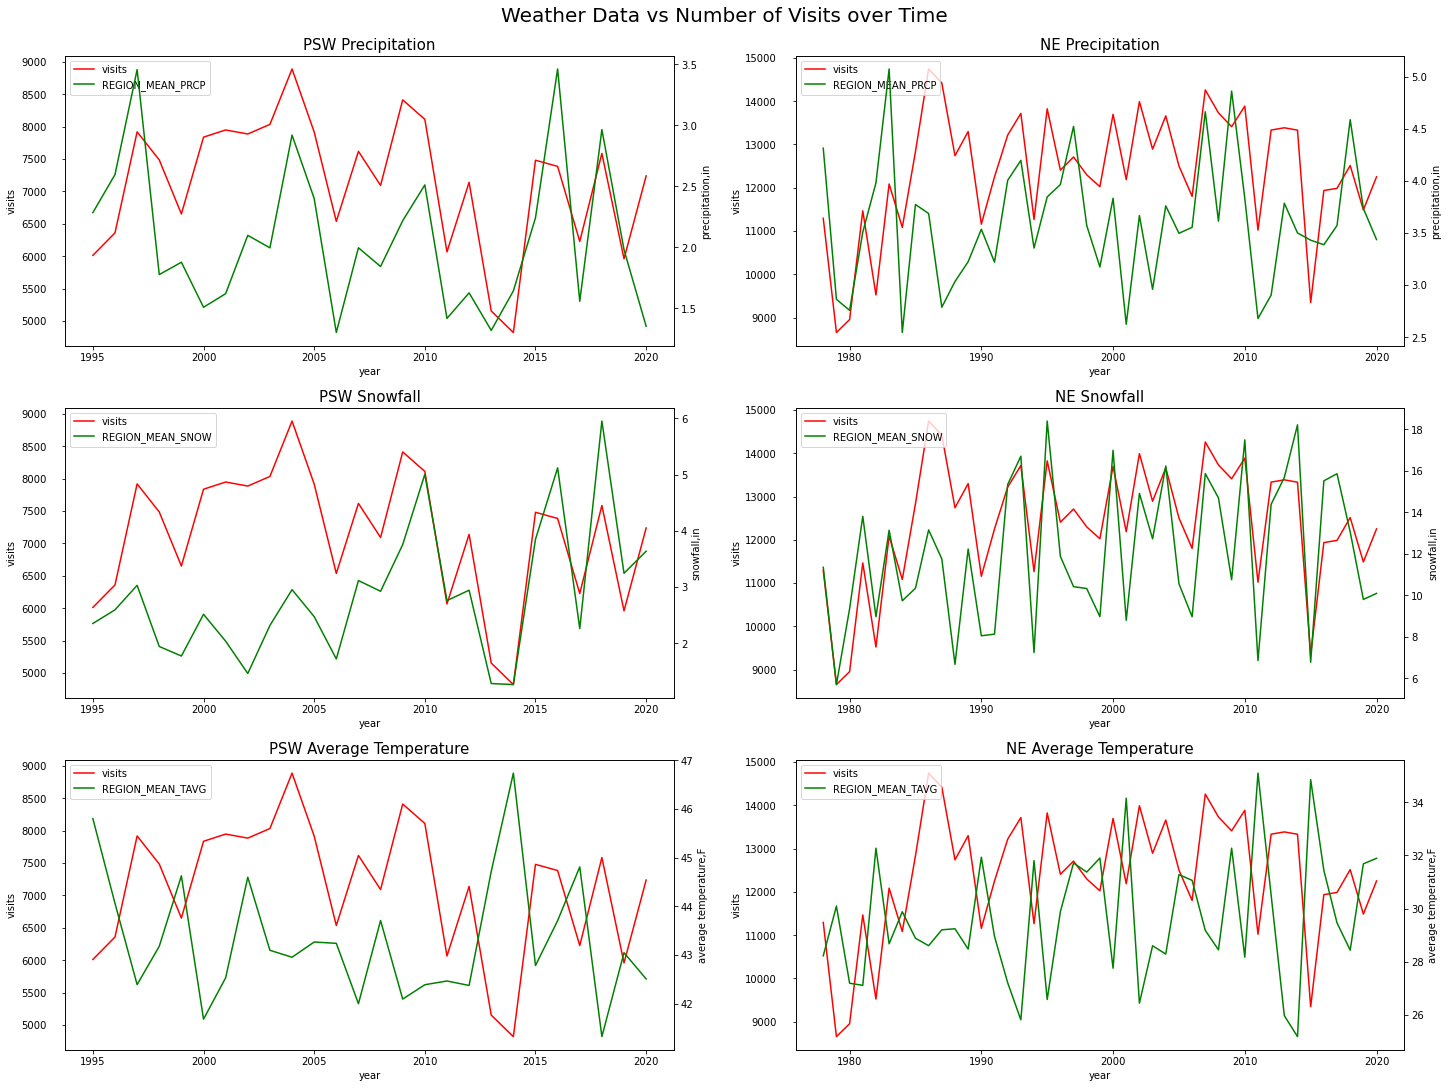

In [49]:
features = {
    'REGION_MEAN_PRCP' : ['precipitation','in'],
    'REGION_MEAN_SNOW' : ['snowfall','in'],
    'REGION_MEAN_TAVG' : ['average temperature','F']
}
region_dfs = {"PSW":df_weather_final_psw, "NE":df_weather_final_ne}

plt.rcParams['figure.figsize'] = [20,15]
fig, ax = plt.subplots(nrows=3, ncols=2, constrained_layout=True)
plt.suptitle('Weather Data vs Number of Visits over Time', fontsize=20)

for row, feature in zip(ax, list(features)):
    for axis, df in zip(row, region_dfs):
        # visits line
        x = region_dfs[df].index.values
        y1 = region_dfs[df].VISITS.values
        line0 = axis.plot(x, y1, '-r', label='visits')
        axis.set_ylabel('visits')
        axis.set_xlabel('year')
        axis.tick_params('y', pad=15)
        axis.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

        # weather line
        axis1 = axis.twinx()
        y2 = region_dfs[df][feature].values
        line1 = axis1.plot(x, y2, '-g', label=feature)
        axis1.set_ylabel(features[feature][0]+','+features[feature][1])
        axis1.set_title(df+' '+features[feature][0].title(), fontsize=15)

        # put legend into one box
        lines = line0+line1
        labs = [l.get_label() for l in lines]
        axis.legend(lines, labs, loc=2)
        
plt.show()

<span style='color:Navy'>
This visualisation shows two very interesting observations:
<ul>
<li> Precipitation and Snowfall fluctuations generally match to Visits fluctuations in both regions
<li> Temperature fluctuations generally match to "reverse"(vice-versa) of Visits fluctuations in both regions
</ul>
Both observations match to the common sense logic:
<ul>
<li> More snow (which is a part of precipitation) - more visits
<li> If it gets warmer (which causes snow to melt) - less visits
</ul>
</span>

## Step 3:  Identify 1-3 research questions and perform analysis  <a class="anchor" id="ii_3"></a>

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.



### 3.1 Research Questions <a class="anchor" id="ii_3_1"></a> 

_**Question 1.** In our region (Pacific Southwest) there are seasons with sharp declines and increases in visits. Is it possible to explain the fluctuations with any of the weather metrics? If yes, can we try to predict the number of visits, assuming we have an accurate winter forecast?_

_**Question 2.** Тhe Northeast region should have much more humid and cold climate. Can we try to find any weather metrics that will allow us to predict ski resorts visits there? Are those metrics different from Pacific Southwest?_

### 3.2 Analysis - Find Correlations <a class="anchor" id="ii_3_2"></a> 

From the graphs in the previous section we saw strong connections between precipitation/snow metrics (presumptive positive correlation) and temperature metrics(presumptive negative correlation). 

Lets look at the pair plots for both regions (only for regions' mean metrics).

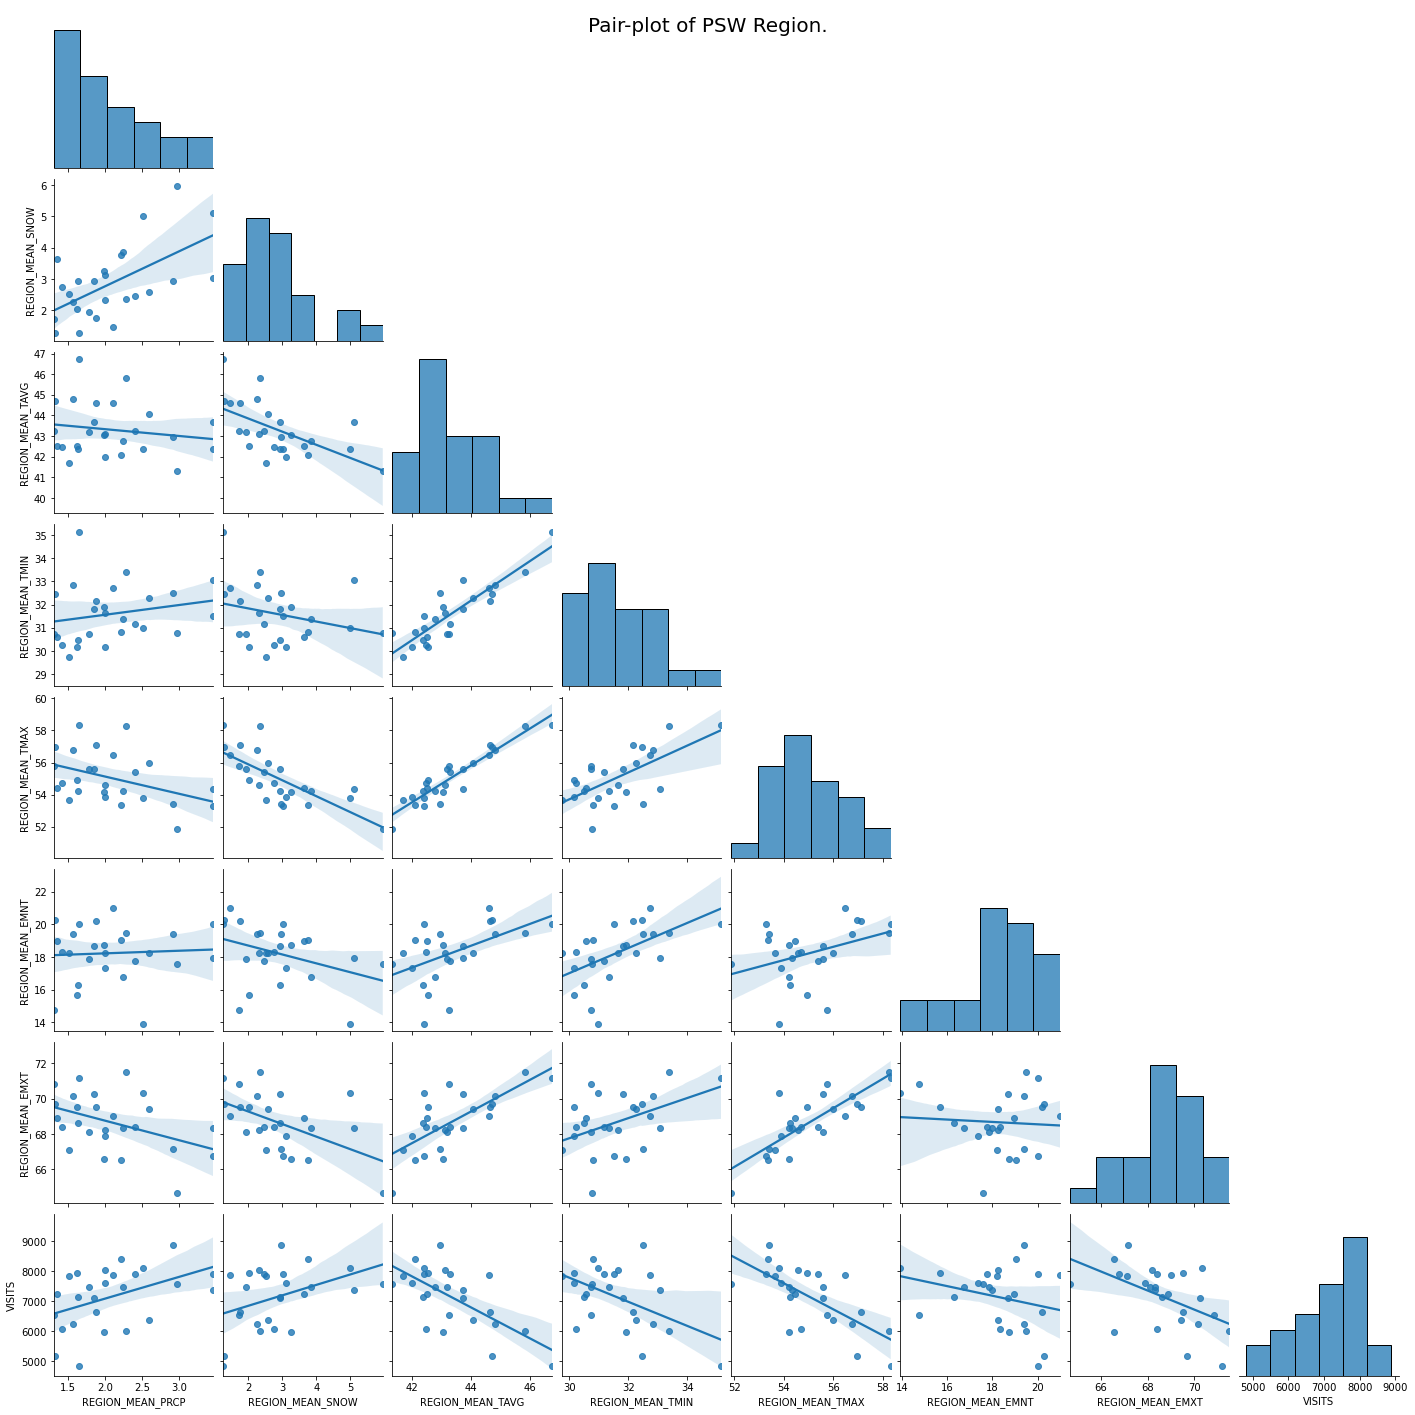

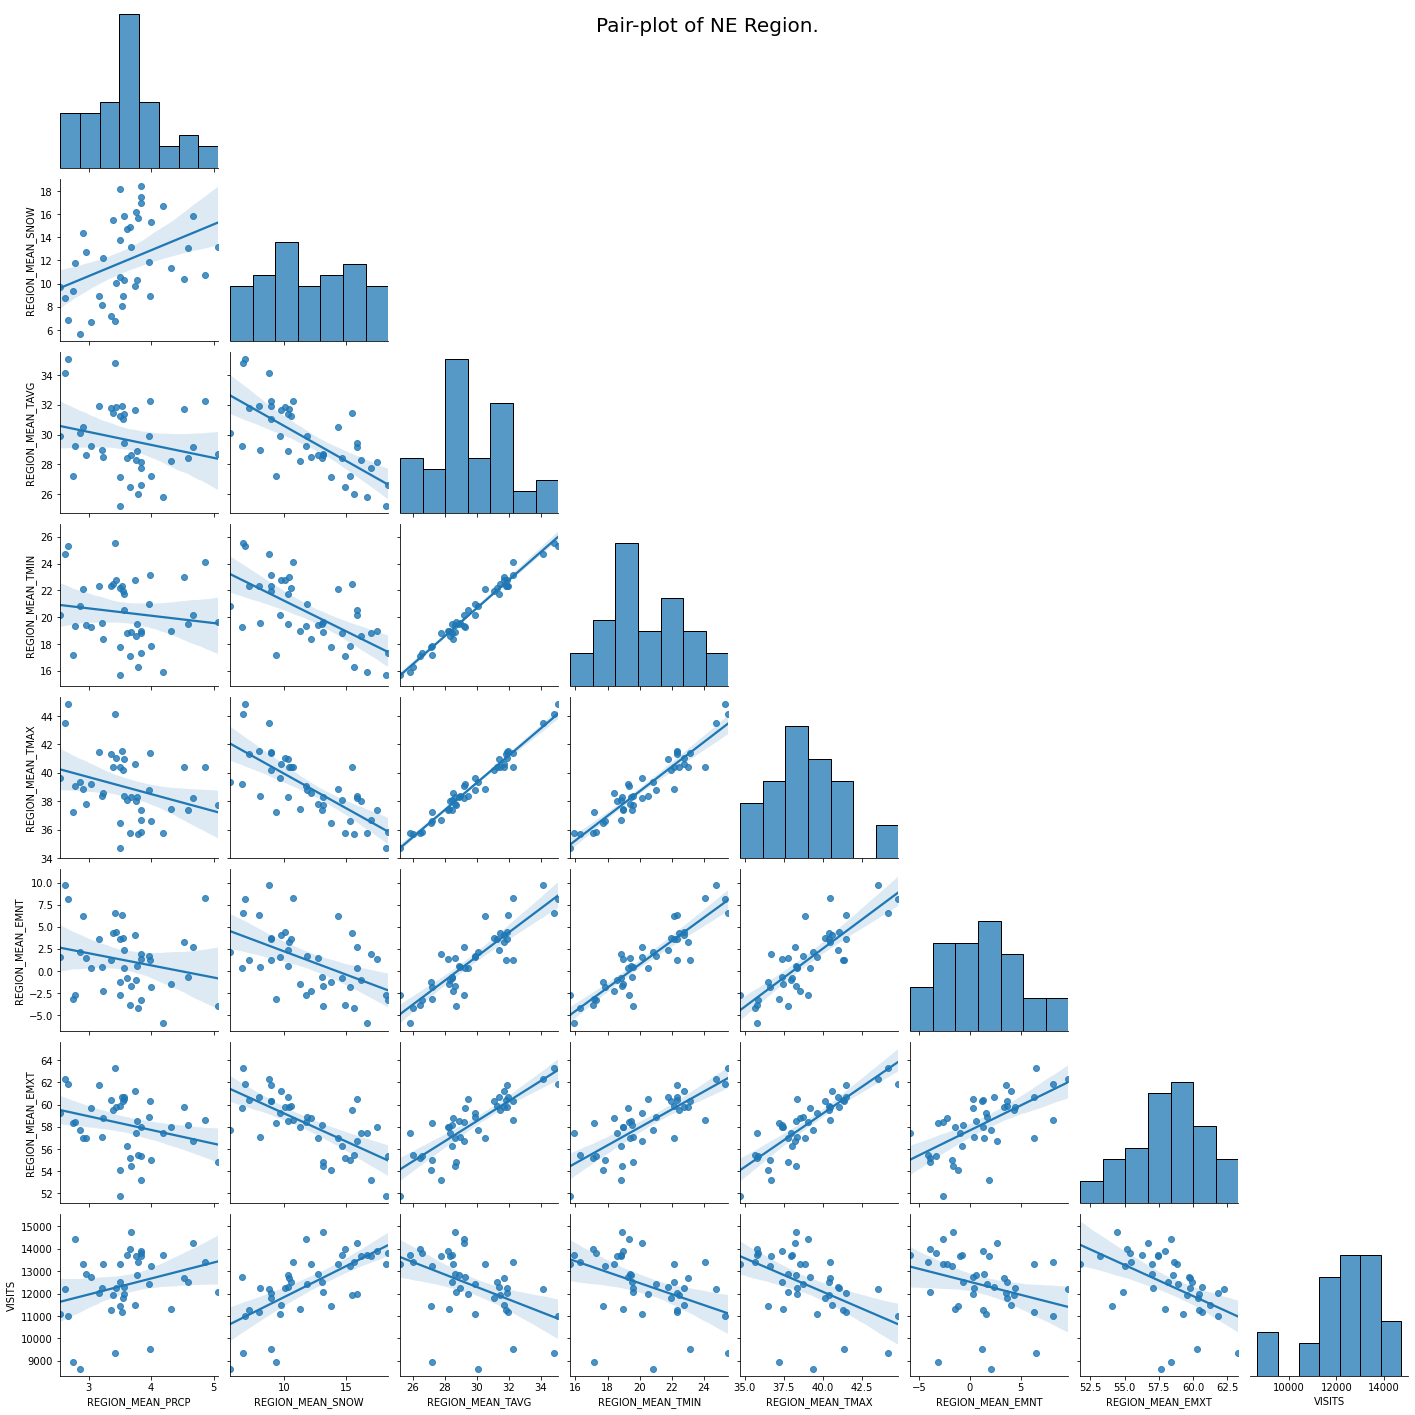

In [50]:
for region_name, region_df in region_dfs.items():
    features = [x for x in region_df.columns if 'REGION' in x]
    features.append('VISITS')
    sns.pairplot(region_df[features], corner=True, kind='reg')
    plt.suptitle(f'Pair-plot of {region_name} Region.', fontsize=20)
    plt.show()

<span style='color:Navy'>
According to the best fit lines of Visits metric, there should be a positive correlation of precipitation metrics and negative correlation of temperature metrics. This supports our findings from the previous section. Lets look at the correlation maps.
</span>

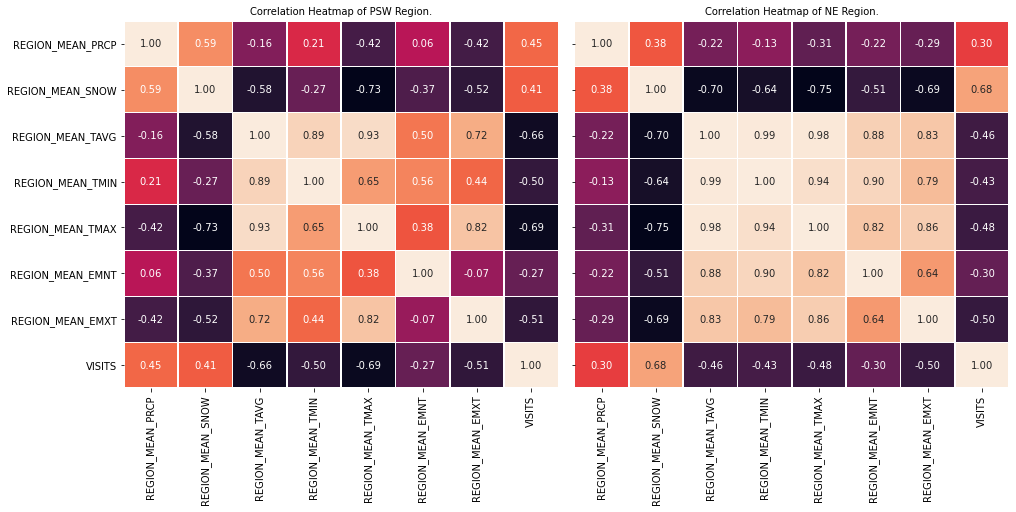

In [51]:
plt.rcParams['figure.figsize'] = [14,7]
fig, ax = plt.subplots(sharey=True, nrows=1, ncols=2, constrained_layout=True)
for i, region in enumerate(region_dfs.items()):
    corr = region[1][features].corr()
    ax[i].set_title(f'Correlation Heatmap of {region[0]} Region.', fontsize=10)
    sns.heatmap(corr,annot=True, fmt=".2f", linewidths=0.5, ax=ax[i], cbar=False)
plt.show()

<span style='color:Navy'>
From the correlation heatmaps, the Pacific Southwest visits are mostly connected to average and maximum temperature. On the other hand, the largest Northeast region correlation is snowfall.
</span>
</br>

</br>Lets print more granular correlations list for both regions.

In [52]:
corrs = {}
for region_name, region_df in region_dfs.items():
    print(f'\nCorrelation of ski visits and {region_name} region\n')
    corrs[region_name] = region_df.corr()['VISITS']
    print(corrs[region_name].sort_values())


Correlation of ski visits and PSW region

CA_TMAX            -0.790560
CA_TAVG            -0.730380
REGION_MEAN_TMAX   -0.688451
REGION_MEAN_TAVG   -0.663571
NV_TMAX            -0.600898
NV_TAVG            -0.599819
CA_EMXT            -0.589321
CA_TMIN            -0.528958
REGION_MEAN_EMXT   -0.509402
AZ_TAVG            -0.504614
REGION_MEAN_TMIN   -0.497655
NV_EMXT            -0.472700
AZ_TMAX            -0.472405
NV_TMIN            -0.469155
AZ_TMIN            -0.409969
AZ_EMXT            -0.292818
AZ_EMNT            -0.283598
REGION_MEAN_EMNT   -0.272775
CA_EMNT            -0.262640
NV_EMNT            -0.208842
AZ_SNOW             0.164045
AZ_PRCP             0.294962
NV_PRCP             0.314104
CA_SNOW             0.322522
REGION_MEAN_SNOW    0.407325
CA_PRCP             0.436456
REGION_MEAN_PRCP    0.445679
NV_SNOW             0.494048
VISITS              1.000000
Name: VISITS, dtype: float64

Correlation of ski visits and NE region

REGION_MEAN_EMXT   -0.497189
ME_TMAX         

#### The correlations above for each state/region prove:
* positive correlation for precipitation and snowfall
* negative correlation for temperatures metrics

### 3.3 Analysis - Linear Regression <a class="anchor" id="ii_3_3"></a> 

We'll use different combinations of features, based on their correlation coefficient with number of ski visits. We'll also try different Linear Regression models to find the best one for this type of prediction. 

Finally, we'll create scatter plots of predicted values vs. true values to find the best model and features.
<a class="anchor" id="predictions_comparison">

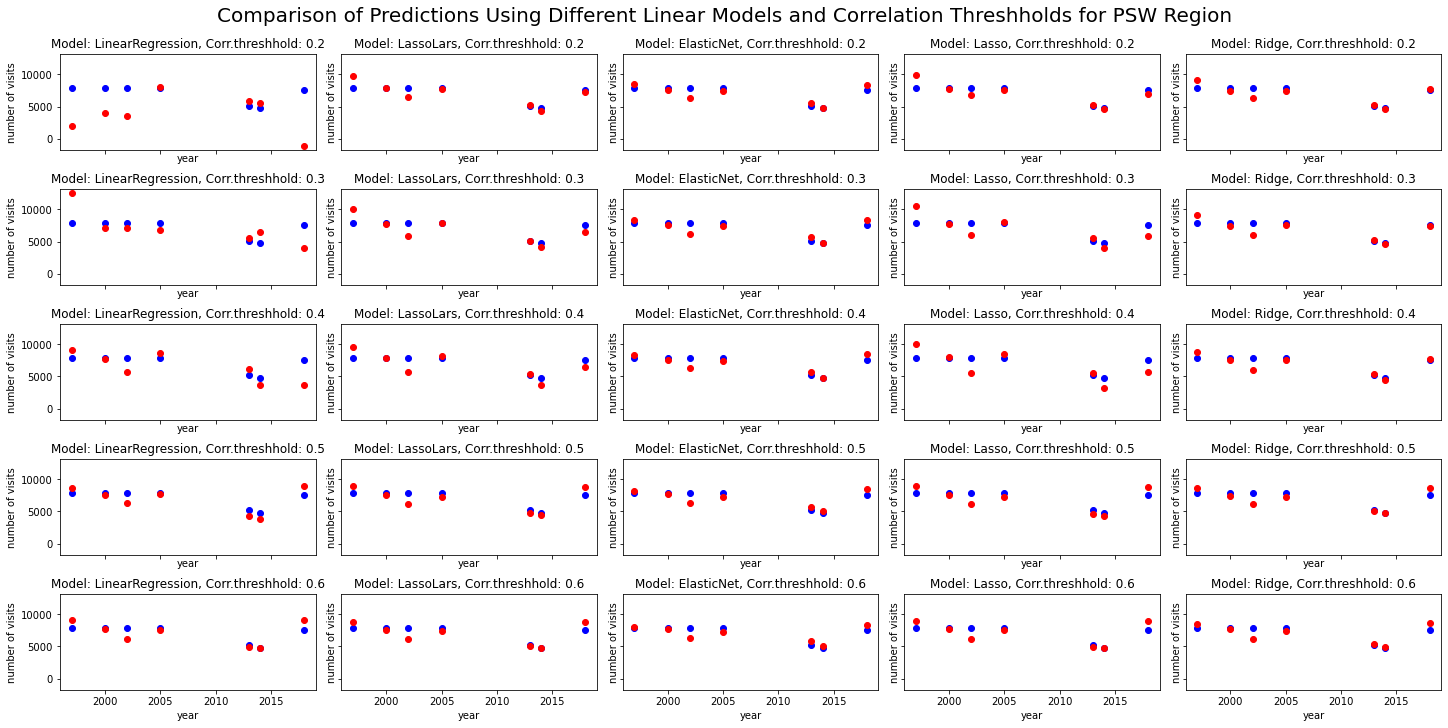

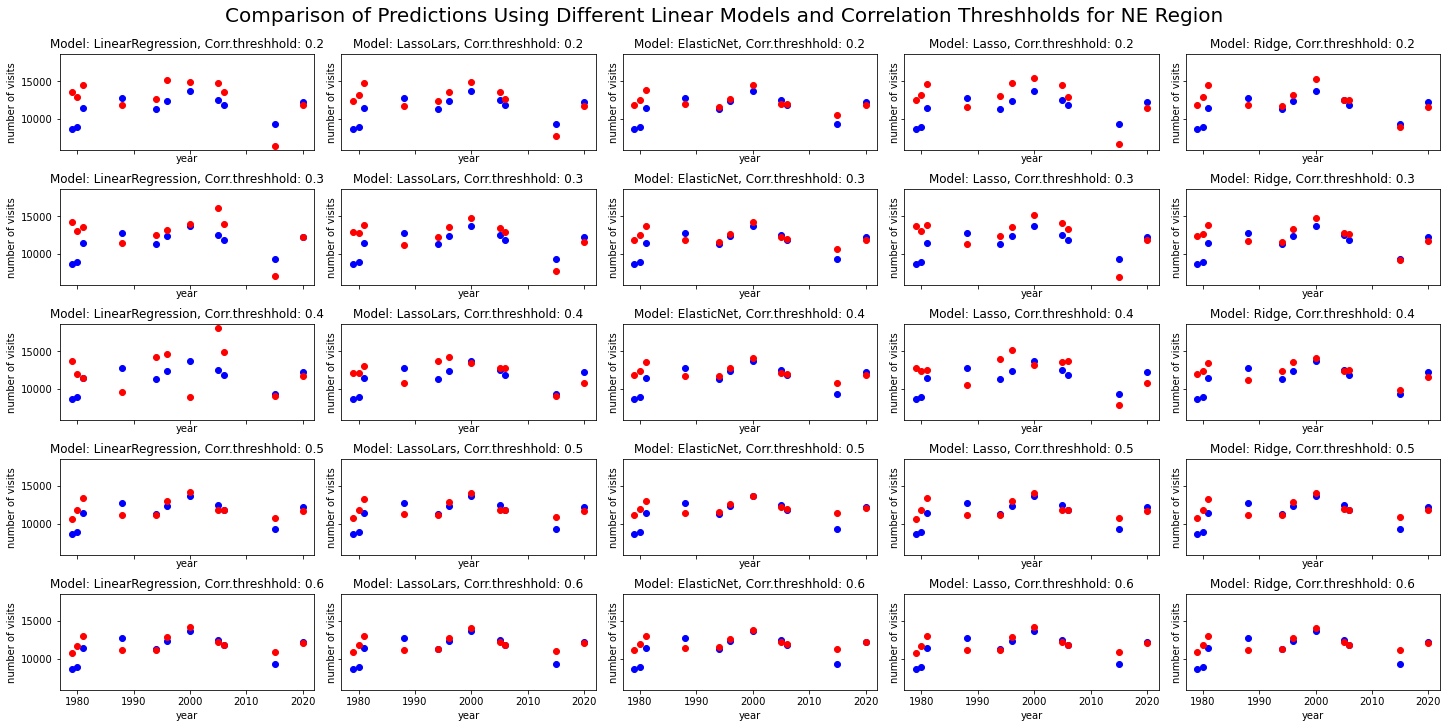

In [53]:
# ignore warnings for simplicity
simplefilter(action='ignore')

# choose only features with correlation coefficients > 0.5
regressors = [LinearRegression(),LassoLars(),ElasticNet(),Lasso(),Ridge()]
correlation_thresholds = [0.2,0.3,0.4,0.5,0.6,0.7]

df_model_corr_th = {}

# function to make the predictions
def make_prediction(regressor, correlation_threshold, region_df, corrs_region):
    # select features
    corrs_region.values
    features = corrs_region[abs(corrs_region.values)>correlation_threshold].index
    features = list(features)
    features.remove('VISITS')  # it has corr. coef. 1
    X = region_df[features].copy()

    # target
    y = region_df[['VISITS']].copy()

    # split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)
    # print(f'Number of samples in train: {len(X_train)}, test: {len(X_test)}')

    # scaling of train data
    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train)

    # fit regressor data and make prediction
    regressor = regressor
    regressor_name = str(regressor)[:-2]
    regressor.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred_test = regressor.predict(X_test_scaled)
    
    return y_train, y_test, y_pred_test, regressor_name      


# make predictions and plot graph for each region
for region_name, region_df in region_dfs.items():
    # create df for filling data to select the best model and correlation threshold
    df_model_corr_th[region_name]= pd.DataFrame(columns=['regressor','corr_th','mse','r2s'])
    
    # select dataframe with correlations     
    corrs_region = corrs[region_name]

    # for plot
    plt.rcParams['figure.figsize'] = [20,10]
    fig, ax = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all', squeeze=True,constrained_layout=True)
    plt.suptitle(f'Comparison of Predictions Using Different Linear Models and Correlation Threshholds for {region_name} Region', fontsize=20)
    
    # make all necessary steps for prediction + plot separate graph for Prediction Model/Corr. Theshhold    
    for row, correlation_threshold in zip(ax, correlation_thresholds):
        for col,regressor  in zip(row, regressors):
            # make prediction             
            y_train, y_test, y_pred_test, regressor_name = make_prediction(regressor, correlation_threshold, region_df, corrs_region)

            # calculate MSE and r2_score
            MSE = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
            r2score = r2_score(y_true = y_test, y_pred = y_pred_test)
            # fill data to df for future selection of the best model
            row = {
                'regressor': regressor_name,
                'corr_th': correlation_threshold,
                'mse': MSE,
                'r2s': abs(r2score)
            }
            df_model_corr_th[region_name] = df_model_corr_th[region_name].append(row, ignore_index=True)
            
            # add subplot to the plot             
            y_actual = y_test.VISITS.values
            y_predicted = y_pred_test
            x1 = y_test.index.values
            line1 = col.scatter(x1, y_actual, color='b')
            line2 = col.scatter(x1, y_predicted, color='r')
            col.set_xlabel('year')
            col.set_ylabel('number of visits')
            col.set_title(f'Model: {regressor_name}, Corr.threshhold: {correlation_threshold}')
    plt.show()


<span style='color:Navy'>
</br>Visually, it is hard to select the best combination from the graphs above, there are many graphs with predicted points that are very close to the truth points. 
</br>
</br>
</span>
Lets narrow down our combinations based on the lowest PSE or the highest R2 Score.

In [54]:
print('Best combination for PSE based on MSE:', list(df_model_corr_th['PSW'].sort_values('mse', ascending=True).iloc[0,0:2]))
print('Best combination for PSE based on R2 Score:', list(df_model_corr_th['PSW'].sort_values('r2s', ascending=True).iloc[0,0:2]))
print('Best combination for NE based on MSE:', list(df_model_corr_th['NE'].sort_values('mse', ascending=True).iloc[0,0:2]))
print('Best combination for NE based on R2 Score:', list(df_model_corr_th['NE'].sort_values('r2s', ascending=True).iloc[0,0:2]))

Best combination for PSE based on MSE: ['ElasticNet', 0.2]
Best combination for PSE based on R2 Score: ['LassoLars', 0.4]
Best combination for NE based on MSE: ['LinearRegression', 0.6]
Best combination for NE based on R2 Score: ['ElasticNet', 0.4]


## Step 4:  Present your findings  <a class="anchor" id="ii_4"></a>

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.


__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


##### Our research was done separately for two regions: Pacific Southwest and Northeast. We used the same methods and the same code to get the answers, however the findings are different for each region.

### 4.1 Pacific Southwest <a class="anchor" id="ii_4_1"></a>

Our research shows, that all selected weather features have correlation greater than 0.2 except snowfall in Arizona. According to NSAA Ski Areas By State (https://nsaa.org/webdocs/Media_Public/IndustryStats/ski_areas_by_state_thru_2021.pdf), number of ski resorts:
* Arizona: 3
* Nevada: 4 (some of them are located at Lake Tahoe and attract people from other states)
* California: 27

In [55]:
region = 'PSW'
print('Top negative correlations, PSW:\n')
print(corrs[region].sort_values().head())
print('\nTop positive correlations, PSW:\n')
print(corrs[region].iloc[:-1].sort_values().tail())

Top negative correlations, PSW:

CA_TMAX            -0.790560
CA_TAVG            -0.730380
REGION_MEAN_TMAX   -0.688451
REGION_MEAN_TAVG   -0.663571
NV_TMAX            -0.600898
Name: VISITS, dtype: float64

Top positive correlations, PSW:

CA_SNOW             0.322522
REGION_MEAN_SNOW    0.407325
CA_PRCP             0.436456
REGION_MEAN_PRCP    0.445679
NV_SNOW             0.494048
Name: VISITS, dtype: float64


#### A. Connection between Weather and Visits to the Ski Resorts <a class="anchor" id="ii_4_1_A"></a>
* The MAX and MEAN temperature metrics have the largest negative correlation coefficients. It is surprising finding, but can be explained by resorts' abilities to maintain operability by producing man-made snow in case of cold temperatures. But if the temperature is warm, both natural and man-induced precipitation will be in the form of rain.

* California MAX and MEAN temperature metrics are at the top of the list. It can be explained by the large population and large concentration of the ski areas, comparing to other states.

* Here is the plot of number of visits against max California temperature, where we can see strong negative connection:

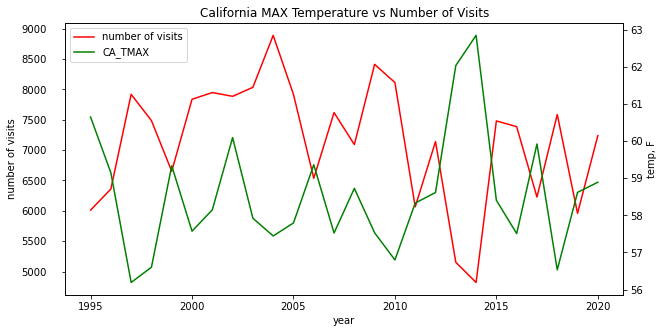

In [56]:
feature = 'CA_TMAX'

# function to plot to be able to reuse for next region
def visit_vs_feature_plot(region, feature, title, y_label):
    plt.rcParams['figure.figsize'] = [10,5]
    fig, axis = plt.subplots()
    # visits line
    x = region_dfs[region].index.values
    y1 = region_dfs[region].VISITS.values
    line0 = axis.plot(x, y1, '-r', label='number of visits')
    axis.set_ylabel('number of visits')
    axis.set_xlabel('year')
    axis.tick_params('y', pad=15)
    axis.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

    # weather line
    axis1 = axis.twinx()
    y2 = region_dfs[region][feature].values
    line1 = axis1.plot(x, y2, '-g', label=feature)
    axis1.set_ylabel(y_label)
    axis1.set_title(title)

    # put legend into one box
    lines = line0+line1
    labs = [l.get_label() for l in lines]
    axis.legend(lines, labs, loc=2)
    plt.show()
    
# plot
visit_vs_feature_plot(region, feature, 'California MAX Temperature vs Number of Visits', 'temp, F')

#### B. Predictability of Visits to the Ski Resorts Based on the Weather Metrics <a class="anchor" id="ii_4_1_B"></a>
* We examined 25 combinations of weather features selection (based on their correlation coefficients) and linear models selection. One of the best results based on the highest R2 score is LassoLars model, with features with corrleation coefficient greater than 0.4. However, visually looking at the [graphs](#predictions_comparison)  from section 3.2, I'd select the Ridge model with coeeficient > 0.4, because its prediction is more accurate for the recent seasons:

In [57]:
corrs[region][abs(corrs[region].values)>0.4].sort_values()

CA_TMAX            -0.790560
CA_TAVG            -0.730380
REGION_MEAN_TMAX   -0.688451
REGION_MEAN_TAVG   -0.663571
NV_TMAX            -0.600898
NV_TAVG            -0.599819
CA_EMXT            -0.589321
CA_TMIN            -0.528958
REGION_MEAN_EMXT   -0.509402
AZ_TAVG            -0.504614
REGION_MEAN_TMIN   -0.497655
NV_EMXT            -0.472700
AZ_TMAX            -0.472405
NV_TMIN            -0.469155
AZ_TMIN            -0.409969
REGION_MEAN_SNOW    0.407325
CA_PRCP             0.436456
REGION_MEAN_PRCP    0.445679
NV_SNOW             0.494048
VISITS              1.000000
Name: VISITS, dtype: float64

* Based on the model and features selected let's plot the lines: Actual vs Predicted Ski Visits (test data)

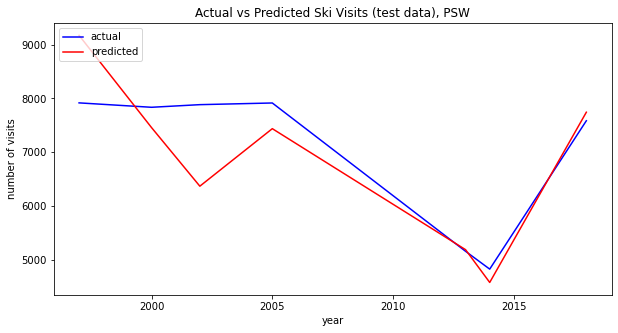

In [58]:
# function to plot to be able to reuse for next region
def actual_vs_predicted_plot(df):
    plt.rcParams['figure.figsize'] = [10,5]
    fig, axis = plt.subplots()
    x = y_test.index.values
    y_ac = df.actual.values
    y_pr = df.predicted.values
    line0 = axis.plot(x, y_ac, '-b', label='actual')
    line1 = axis.plot(x, y_pr, '-r', label='predicted')
    axis.set_ylabel('number of visits')
    axis.set_xlabel('year')
    axis.set_title(f'Actual vs Predicted Ski Visits (test data), {region}')

    # put legend into one box
    lines = line0+line1
    labs = [l.get_label() for l in lines]
    axis.legend(lines, labs, loc=2)
    plt.show()

# make prediction based on selected model
y_train, y_test, y_pred_test, regressor_name = make_prediction(regressor=Ridge(), correlation_threshold=0.2, region_df=region_dfs[region], corrs_region=corrs[region])
y_test['predicted'] = (y_pred_test)
y_test.columns = ['actual', 'predicted']
y_test = y_test.sort_index()

# plot
actual_vs_predicted_plot(y_test)

* The prediction seems to be pretty close to the actual results, especially between seasons 2005 - 2020.

### 4.2 Northeast <a class="anchor" id="ii_4_2"></a>

Northeast region has different set of winter weather metrics that affect its number of visits to the ski areas. Lets look again at the correlation coefficients:

In [59]:
region = 'NE'
print('Top negative correlations, NE:\n')
print(corrs[region].sort_values().head())
print('\nTop positive correlations, NE:\n')
print(corrs[region].iloc[:-1].sort_values().tail())

Top negative correlations, NE:

REGION_MEAN_EMXT   -0.497189
ME_TMAX            -0.493462
CT_TMAX            -0.492470
CT_EMXT            -0.492158
NH_TMAX            -0.488287
Name: VISITS, dtype: float64

Top positive correlations, NE:

NY_SNOW             0.614009
MA_SNOW             0.633954
VT_SNOW             0.637684
NH_SNOW             0.669535
REGION_MEAN_SNOW    0.678843
Name: VISITS, dtype: float64


#### A. Connection between Weather and Visits to the Ski Resorts <a class="anchor" id="ii_4_2_A"></a>

* If Pacific Southwest region visits mostly were influenced by mean and max. temperature, the Northeast region shows strong correlation with the snowfall, mostly in New Hampshire and Vermont. 

* Maximum and extreme maximum temperature metrics are also a big factor with correlation coefficient ~0.5.

* Looks like because of the relatively cold climate, the temperatures usually are not so important for people to go skiing as natural snow.

* Here is the plot of NE number of visits against the average snowfall, where we can see the strong positive connection:

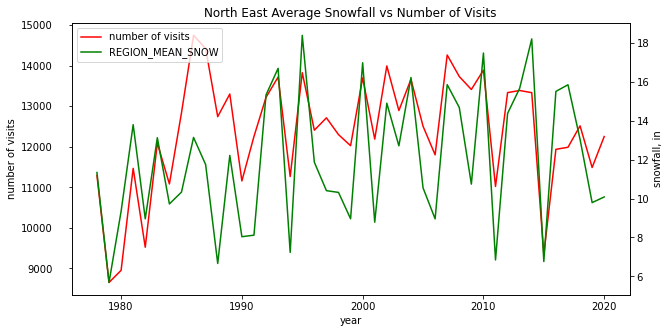

In [60]:
feature = 'REGION_MEAN_SNOW'
visit_vs_feature_plot(region, feature, 'North East Average Snowfall vs Number of Visits', 'snowfall, in')

#### B. Predictability of Visits to the Ski Resorts Based on the Weather Metrics <a class="anchor" id="ii_4_2_B"></a>
* As with PSW region, we examined 25 combinations of weather features selection and linear models selection for NE region too. 


One of the best results based on the lowest mean squared error is Linear Regression and feature with correlation coefficient > 0.6. 

Again, visually looking at the graphs from section 3.2, I'd select the Ridge model with coeeficient > 0.4, because its prediction is more accurate for the recent seasons:

* Based on the model and features selected let's plot the lines: Actual vs Predicted Ski Visits (test data)

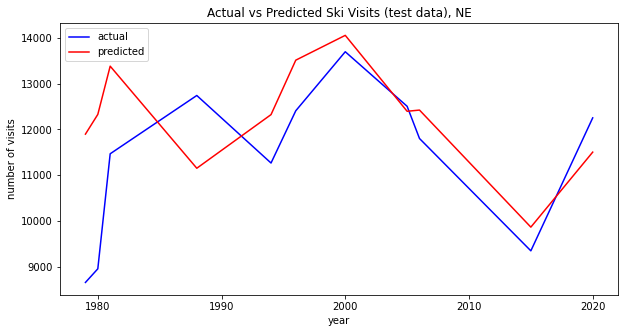

In [61]:
# make prediction based on selected model
y_train, y_test, y_pred_test, regressor_name = make_prediction(regressor=Ridge(), correlation_threshold=0.4, region_df=region_dfs[region], corrs_region=corrs[region])
y_test['predicted'] = (y_pred_test)
y_test.columns = ['actual', 'predicted']
y_test = y_test.sort_index()

# plot
actual_vs_predicted_plot(y_test)

* The prediction is close to actual values starting year 1995.

### 4.3 Limitations <a class="anchor" id="ii_4_3"></a>

Here are some of the main limitations of the research:

**1. Ski visits data limitation: number of samples.** The initial dataset from National Ski Areas Association has only seasons data, which is only 43 samples for Northeast and 26 samples for Pacific Southwest. We have access to NOAA monthly and daily weather observations. The prediction could be much more exact if we had monthly/daily ski visits data.
    
**2. Ski visits data limitation: number of features.** Division by regions is too broad. For example, Arizona resort might have completely different weather than Lake Tahoe resorts, but we mixed them into one sample. Having data about visits per state (or even per ski resort) would allow to make more comprehensive analysis.

**3. Number of ski visits can have much more different factors than just weather.** 
* From the graphs we can see that in 70s-90s the prediction line is not very aligned with actual visits line. May be in the past people had different reasons and different mentality. The global warming / climate change was not an issue.
* Ski sport is expensive. Economic data might be a factor too, which can be a topic of separate research.
* All regions have spike in season 2020-2021. There were COVID restrictions in most entertaiment areas, but the ski resorts were open and hosted increased number of visitors with no relationship to any weather events.